In [77]:
#import all the required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_squared_error


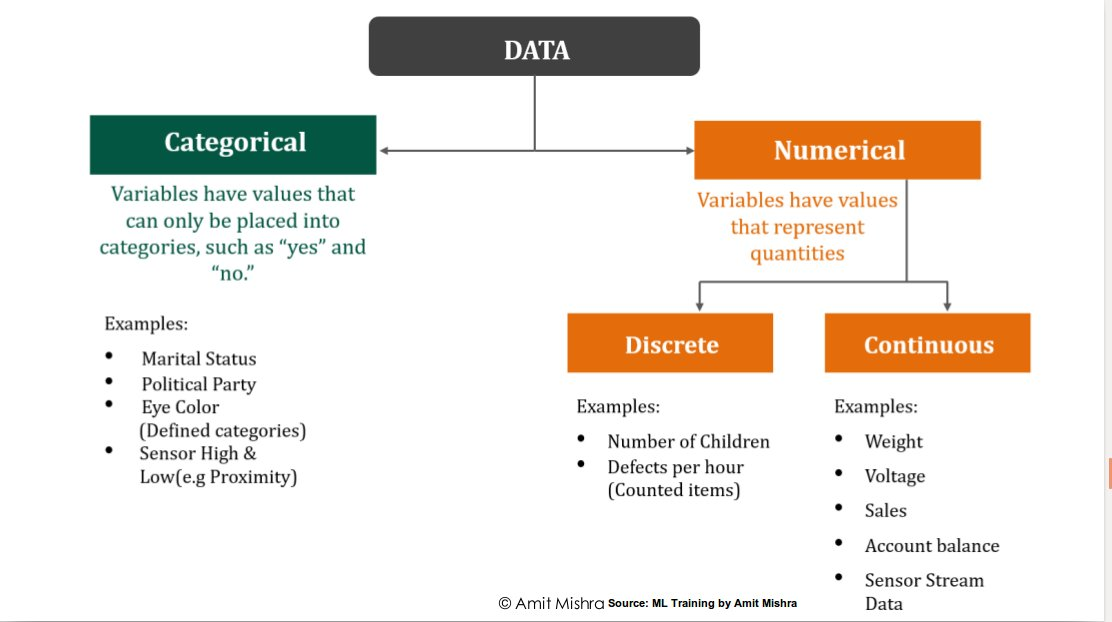

In [78]:
from google.colab.patches import cv2_imshow
import cv2
img = cv2.imread('type_data.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

### Load dataset and verify

In [79]:
# Import dataset
toyota_df = pd.read_csv("Toyota.csv",index_col=0,na_values=['??','???','????'])

In [80]:
# check the data using head()
toyota_df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,three,1165
1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165
2,13950,24.0,41711.0,Diesel,90.0,NaN,0,2000,3,1165
3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165
4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170


In [81]:
# Count the number of records in each column.
toyota_df.count()

Price        1436
Age          1336
KM           1421
FuelType     1336
HP           1430
MetColor     1286
Automatic    1436
CC           1436
Doors        1436
Weight       1436
dtype: int64

In [82]:
# Check the stats of the data
toyota_df.describe()

,Price,Age,KM,HP,MetColor,Automatic,CC,Weight
count,1436.000000,1336.000000,1421.000000,1430.000000,1286.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.672156,68647.239972,101.478322,0.674961,0.055710,1566.827994,1072.45961
std,3626.964585,18.589804,37333.023589,14.768255,0.468572,0.229441,187.182436,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,1000.00000
25%,8450.000000,43.000000,43210.000000,90.000000,0.000000,0.000000,1400.000000,1040.00000
50%,9900.000000,60.000000,63634.000000,110.000000,1.000000,0.000000,1600.000000,1070.00000
75%,11950.000000,70.000000,87000.000000,110.000000,1.000000,0.000000,1600.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,1615.00000


In [83]:
# Check if there is any null value in the dataset.
toyota_df.isnull().sum()

Price          0
Age          100
KM            15
FuelType     100
HP             6
MetColor     150
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64

### Replace three, four and five in Doors

In [84]:
toyota_df['Doors'] = toyota_df['Doors'].replace('three',3)
toyota_df['Doors'] = toyota_df['Doors'].replace('four',4)
toyota_df['Doors'] = toyota_df['Doors'].replace('five',5)

### Use imputers of SKLearn to replace missing values, mean for numerical and mode for frequency

In [85]:
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
mode_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
toyota_df['Age'] = mean_imputer.fit_transform(toyota_df['Age'].values.reshape(-1,1))[:,0]


In [86]:
toyota_df['KM'] = mean_imputer.fit_transform(toyota_df['KM'].values.reshape(-1,1))[:,0]

In [87]:
mode_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
toyota_df['FuelType'] = mode_imputer.fit_transform(toyota_df['FuelType'].values.reshape(-1,1))[:,0]

In [88]:
toyota_df['MetColor'] = mode_imputer.fit_transform(toyota_df['MetColor'].values.reshape(-1,1))[:,0]

In [89]:
toyota_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1436 non-null   float64
 2   KM         1436 non-null   float64
 3   FuelType   1436 non-null   object 
 4   HP         1430 non-null   float64
 5   MetColor   1436 non-null   float64
 6   Automatic  1436 non-null   int64  
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   object 
 9   Weight     1436 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 123.4+ KB


In [90]:
toyota_df.isnull().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           6
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

### Change datatype of HP and Doors

In [91]:
#Values of HP
toyota_df.HP = toyota_df['HP'].astype('float32')

In [92]:
toyota_df['HP'] = mean_imputer.fit_transform(toyota_df['HP'].values.reshape(-1,1))[:,0]

In [93]:
toyota_df.Doors = toyota_df['Doors'].astype('int32')

In [94]:
### Check normal distribution of target attribute using distplot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


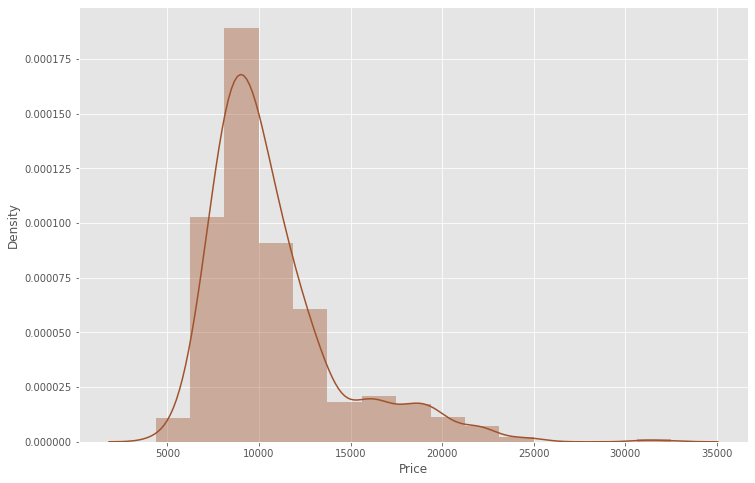

In [95]:
plt.style.use('ggplot')
plt.figure(figsize=(12,8))
sns.distplot(toyota_df.Price,bins=15,color='sienna')

### Check for outliers and Skewness of data using Box Whisker plot

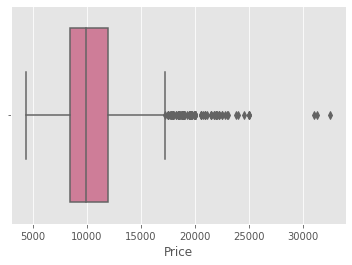

In [96]:
sns.boxplot(x=toyota_df['Price'],orient='h',color='palevioletred')

### Outlier detection and removal
### IQR = Q3 - Q1
### Upper_Limit = Q3 + IQR*1.5
### Lower_Limit = Q1 - IQR*1.5


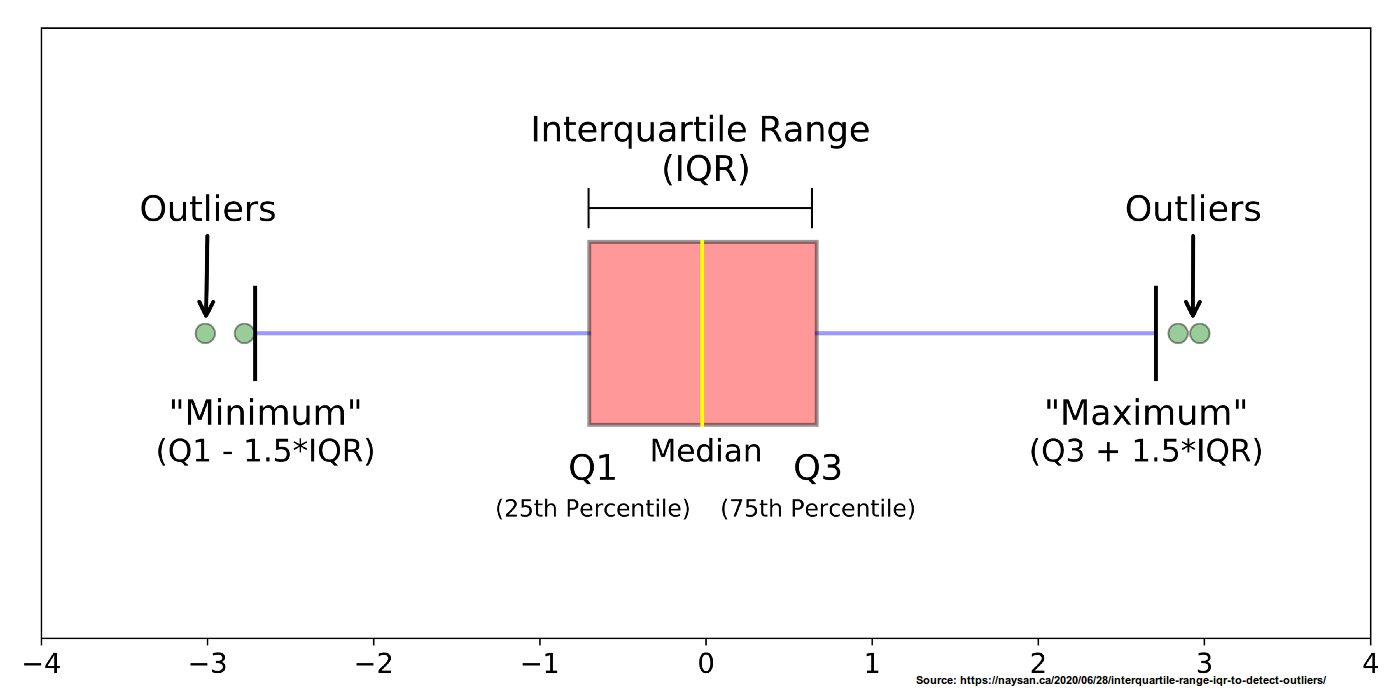

In [97]:
img = cv2.imread('IQR.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [98]:
percentile25 = toyota_df['Price'].quantile(0.25)
percentile75 = toyota_df['Price'].quantile(0.75)
iqr = percentile75 - percentile25
print(percentile25,percentile75)

8450.0 11950.0


In [99]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(upper_limit,lower_limit)

17200.0 3200.0


In [100]:
toyota_df[toyota_df['Price'] > upper_limit]



,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
7,18600,30.000000,75889.0,Petrol,90.0,1.0,0,2000,3,1245
8,21500,27.000000,19700.0,Petrol,192.0,0.0,0,1800,3,1185
10,20950,25.000000,31461.0,Petrol,192.0,0.0,0,1800,3,1185
11,19950,22.000000,43610.0,Petrol,192.0,0.0,0,1800,3,1185
12,19600,25.000000,32189.0,Petrol,192.0,0.0,0,1800,3,1185
...,...,...,...,...,...,...,...,...,...,...
182,21125,2.000000,225.0,Petrol,97.0,1.0,0,1400,5,1110
183,21500,55.672156,15.0,Petrol,110.0,1.0,0,1600,5,1130
184,17795,1.000000,1.0,Petrol,98.0,1.0,0,1400,4,1100
185,18245,1.000000,1.0,Petrol,110.0,1.0,0,1600,5,1075


In [101]:
toyota_df[toyota_df['Price'] < lower_limit]

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight


### Outlier Capping

In [102]:
new_toyota_df = toyota_df.copy()
new_toyota_df['Price'] = np.where(
    new_toyota_df['Price'] > upper_limit,
    upper_limit,
    np.where(
        new_toyota_df['Price'] < lower_limit,
        lower_limit,
        new_toyota_df['Price']
    )
)

In [103]:
new_toyota_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   float64
 1   Age        1436 non-null   float64
 2   KM         1436 non-null   float64
 3   FuelType   1436 non-null   object 
 4   HP         1436 non-null   float32
 5   MetColor   1436 non-null   float64
 6   Automatic  1436 non-null   int64  
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   int32  
 9   Weight     1436 non-null   int64  
dtypes: float32(1), float64(4), int32(1), int64(3), object(1)
memory usage: 112.2+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

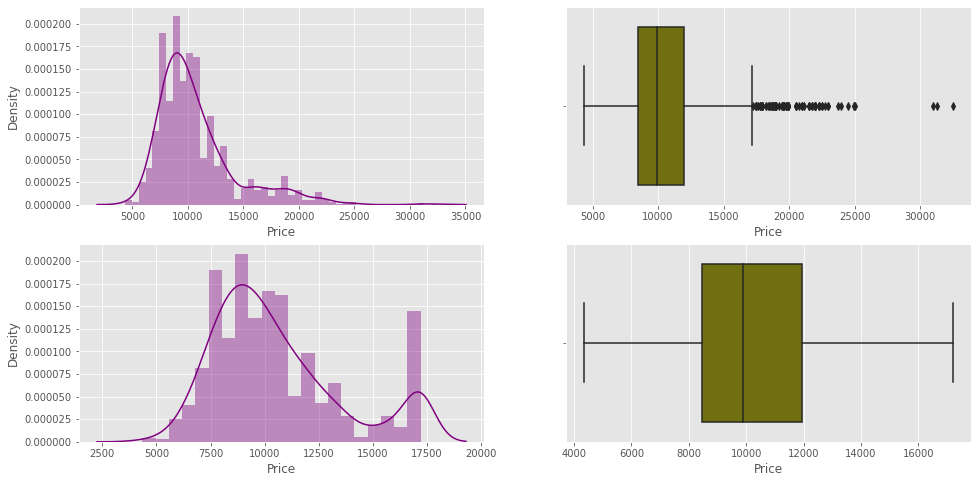

In [104]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.color_palette("Paired")
sns.distplot(toyota_df['Price'],color='purple')
plt.subplot(2,2,2)
sns.boxplot(toyota_df['Price'],color='olive')
plt.subplot(2,2,3)
sns.distplot(new_toyota_df['Price'],color = 'purple')
plt.subplot(2,2,4)
sns.boxplot(new_toyota_df['Price'],color='olive')
plt.show()

### Visualize correlation of attribute

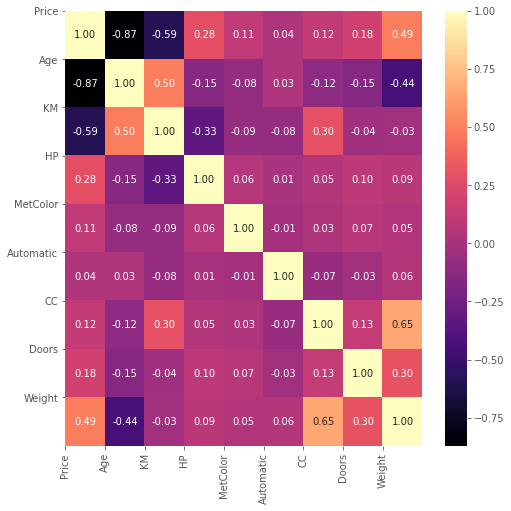

In [105]:
# Check Correlation amoung parameters
corr = new_toyota_df.corr()
fig, ax = plt.subplots(figsize=(8,8))
# Generate a heatmap
sns.heatmap(corr, cmap = 'magma', annot = True, fmt = ".2f")
plt.xticks(range(len(corr.columns)), corr.columns)

plt.yticks(range(len(corr.columns)), corr.columns)

plt.show()

### Understanding correlation with Boston dataset

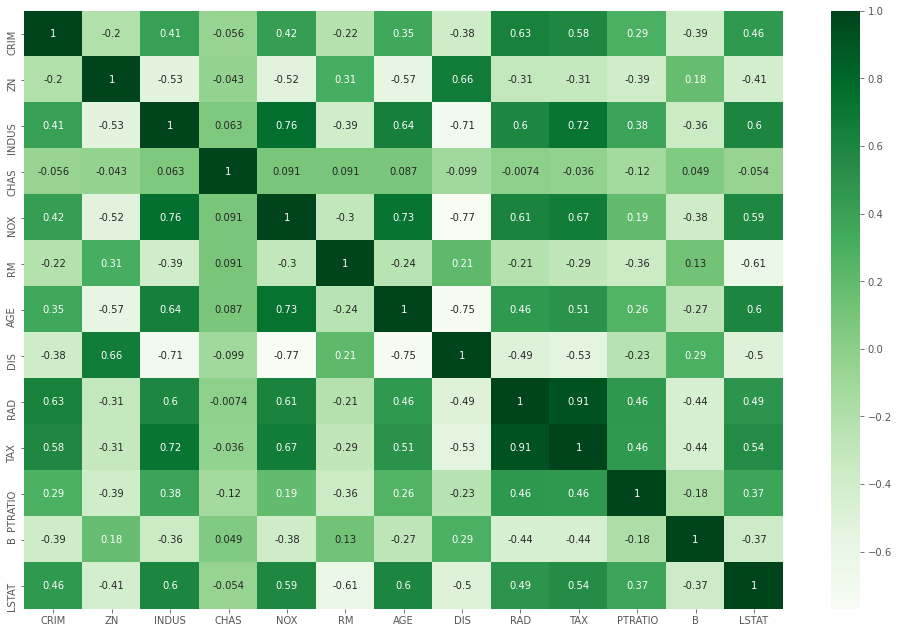

In [106]:
from sklearn.datasets import load_boston
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
plt.figure(figsize=(17,11))
sns.heatmap(boston_df.corr('pearson'), annot = True,cmap='Greens')

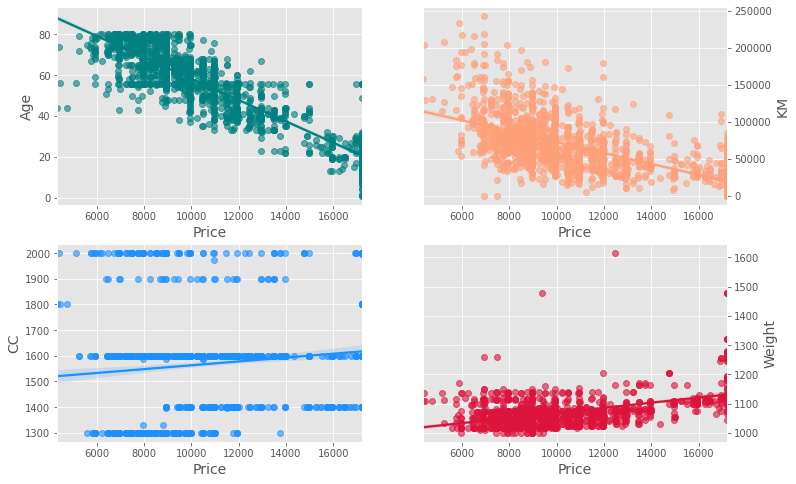

In [107]:
# plot regplots  for Age, KM, CC & HP against Price
f, axes = plt.subplots(2,2, figsize=(12,8))
# Age Vs Price
sns.regplot(x = 'Price', y = 'Age', data = new_toyota_df, ax = axes[0,0], scatter_kws={'alpha':0.6},color='teal')
axes[0,0].set_xlabel('Price', fontsize = 14)
axes[0,0].set_ylabel('Age', fontsize=14)
axes[0,0].yaxis.tick_left()

# KM Vs Price
sns.regplot(x = 'Price', y = 'KM', data = new_toyota_df, ax = axes[0,1], scatter_kws={'alpha':0.6},color='lightsalmon')
axes[0,1].set_xlabel('Price', fontsize = 14)
axes[0,1].set_ylabel('KM', fontsize=14)
axes[0,1].yaxis.set_label_position("right")
axes[0,1].yaxis.tick_right()

# CC Vs Price
sns.regplot(x = 'Price', y = 'CC', data = new_toyota_df, ax = axes[1,0], scatter_kws={'alpha':0.6},color='dodgerblue')
axes[1,0].set_xlabel('Price', fontsize = 14)
axes[1,0].set_ylabel('CC', fontsize=14)
axes[1,0].yaxis.tick_left()

# Weight Vs Price
sns.regplot(x = 'Price', y = 'Weight', data = new_toyota_df, ax = axes[1,1], scatter_kws={'alpha':0.6},color='crimson')
axes[1,1].set_xlabel('Price', fontsize = 14)
axes[1,1].set_ylabel('Weight', fontsize=14)
axes[1,1].yaxis.set_label_position("right")
axes[1,1].yaxis.tick_right()

plt.show()


In [108]:
new_toyota_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   float64
 1   Age        1436 non-null   float64
 2   KM         1436 non-null   float64
 3   FuelType   1436 non-null   object 
 4   HP         1436 non-null   float32
 5   MetColor   1436 non-null   float64
 6   Automatic  1436 non-null   int64  
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   int32  
 9   Weight     1436 non-null   int64  
dtypes: float32(1), float64(4), int32(1), int64(3), object(1)
memory usage: 112.2+ KB


### Convert categorical to numerical by Labelencoding using get dummies function of pandas

In [109]:
# Create the clasiification.
data_df = pd.get_dummies(new_toyota_df)


In [110]:
data_df.head()


,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol
0,13500.0,23.0,46986.0,90.0,1.0,0,2000,3,1165,0,1,0
1,13750.0,23.0,72937.0,90.0,1.0,0,2000,3,1165,0,1,0
2,13950.0,24.0,41711.0,90.0,1.0,0,2000,3,1165,0,1,0
3,14950.0,26.0,48000.0,90.0,0.0,0,2000,3,1165,0,1,0
4,13750.0,30.0,38500.0,90.0,0.0,0,2000,3,1170,0,1,0


In [111]:
### Simple Linear regression with Age as input attribute

In [112]:
from sklearn.linear_model import LinearRegression

In [113]:
#Simple Linear Regression

In [114]:
X_simple_lreg = data_df[["CC"]].values
y_simple_lreg = data_df["Price"].values

print(X_simple_lreg[0:5])
print(y_simple_lreg[0:5])

[[2000]
 [2000]
 [2000]
 [2000]
 [2000]]
[13500. 13750. 13950. 14950. 13750.]


In [115]:
print((X_simple_lreg).ndim)
print((y_simple_lreg).ndim)

2
1


In [116]:
# Create train test dataset
from sklearn.model_selection import train_test_split
X_train_slreg, X_test_slreg, y_train_slreg, y_test_slreg = train_test_split(X_simple_lreg,y_simple_lreg, test_size = 0.25, random_state = 4)
print('Train Dataset : ', X_train_slreg.shape, y_train_slreg.shape)
print('Test Dataset : ', X_test_slreg.shape, y_test_slreg.shape)

Train Dataset :  (1077, 1) (1077,)
Test Dataset :  (359, 1) (359,)


In [117]:
simple_lreg = LinearRegression()
simple_lreg.fit(X_train_slreg, y_train_slreg)
print('Intercept : ', simple_lreg.intercept_)
print('Slope : ', simple_lreg.coef_)

Intercept :  7881.959014965187
Slope :  [1.61125436]


In [118]:
# Use the model to predict the test dataset.
y_simplelreg_pred_test = simple_lreg.predict(X_test_slreg)

# Use the model to predict the train dataset.
y_simplelreg_pred_train = simple_lreg.predict(X_train_slreg)

In [119]:
# Calculate the eualuation metrics of the model.
from sklearn.metrics import r2_score
r2_score_slreg_train = r2_score(y_simplelreg_pred_train, y_train_slreg)
r2_score_slreg_test = r2_score(y_simplelreg_pred_test, y_test_slreg)
rmse_slreg = np.sqrt(mean_squared_error(y_simplelreg_pred_test, y_test_slreg)**2)
print('r2_ score for train dataset for simple linear reg : ', r2_score_slreg_train)
print('r2_ score for test dataset for simple linear reg : ', r2_score_slreg_test)
print('root mean squared error for simple linear reg : ', rmse_slreg)

r2_ score for train dataset for simple linear reg :  -89.2712738485133
r2_ score for test dataset for simple linear reg :  -118.11182952281864
root mean squared error for simple linear reg :  9454549.594628438


In [120]:
# Multiple Regression using all input attributes

In [121]:
# Separating the independent and dependent variable.
X_multi_lreg = data_df.drop('Price', axis = 1).values
y_multi_lreg = data_df["Price"].values.reshape(-1,1)

In [122]:
X_multi_lreg

array([[2.30000000e+01, 4.69860000e+04, 9.00000000e+01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.30000000e+01, 7.29370000e+04, 9.00000000e+01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.40000000e+01, 4.17110000e+04, 9.00000000e+01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [5.56721557e+01, 1.70160000e+04, 8.60000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [7.00000000e+01, 6.86472400e+04, 8.60000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [7.60000000e+01, 1.00000000e+00, 1.10000000e+02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [123]:
y_multi_lreg

array([[13500.],
       [13750.],
       [13950.],
       ...,
       [ 8500.],
       [ 7250.],
       [ 6950.]])

In [124]:
# Create train test dataset
from sklearn.model_selection import train_test_split
X_train_mlreg, X_test_mlreg, y_train_mlreg, y_test_mlreg = train_test_split(X_multi_lreg,y_multi_lreg, test_size = 0.25, random_state = 4)
print('Train Dataset : ', X_train_mlreg.shape, y_train_mlreg.shape)
print('Test Dataset : ', X_test_mlreg.shape, y_test_mlreg.shape)

Train Dataset :  (1077, 11) (1077, 1)
Test Dataset :  (359, 11) (359, 1)


In [125]:
multi_lreg = LinearRegression()
multi_lreg.fit(X_train_mlreg, y_train_mlreg)
print('Intercept : ', multi_lreg.intercept_)
print('Slope : ', multi_lreg.coef_.size)


Intercept :  [994.88623087]
Slope :  11


In [126]:
# Use the model to predict the test dataset.
y_mlreg_pred_test = multi_lreg.predict(X_test_mlreg)

# Use the model to predict the train dataset.
y_mlreg_pred_train = multi_lreg.predict(X_train_mlreg)


In [127]:
#X_train_mlreg, X_test_mlreg, y_train_mlreg, y_test_mlreg 
# Have a look at the predicted & actual values.
print(y_mlreg_pred_test[0:5])
print(y_test_mlreg[0:5])

print(y_mlreg_pred_train[0:5])
print(y_train_mlreg[0:5])

[[ 8010.37444204]
 [10099.56448466]
 [ 9721.89537118]
 [11401.04976176]
 [ 8762.87918167]]
[[8950.]
 [9850.]
 [8250.]
 [9750.]
 [9250.]]
[[10104.05445543]
 [ 6657.62706027]
 [11521.43240445]
 [12693.50047268]
 [10102.8897226 ]]
[[ 8900.]
 [ 8250.]
 [10450.]
 [13500.]
 [ 8250.]]


In [128]:
# Calculate the eualuation metrics of the model.
from sklearn.metrics import r2_score
r2_score_mlreg_train = r2_score(y_mlreg_pred_train, y_train_mlreg)
r2_score_mlreg_test = r2_score(y_mlreg_pred_test, y_test_mlreg)
rmse_mlreg = np.sqrt(mean_squared_error(y_mlreg_pred_test, y_test_mlreg)**2)
print('r2_ score for train dataset for multi linear reg : ', r2_score_mlreg_train)
print('r2_ score for test dataset for multi linear reg : ', r2_score_mlreg_test)
print('root mean squared error for multi linear reg : ', rmse_mlreg)

r2_ score for train dataset for multi linear reg :  0.8004993173622108
r2_ score for test dataset for multi linear reg :  0.7866413152932784
root mean squared error for multi linear reg :  1688074.695099086
